# Introduction
The main purpose of this project is for the submission of Machine Learning for Developers project Assignment. Secondly i have chosen this dataset as to how is the mobile specifications impact the price range of the mobile phones.
## DataSet Information 
At the same time, this project will help to also find out and solve bob's problem. 
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc. He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.(context from kaggle.com) 

In this problem you do not have to predict actual price but a price range indicating how high the price is.

##### This is a standard supervised classification problem. A classification problem where we have to predict the price range of mobile falls in 0 (low cost) ,1 (medium) ,2 (high),3 (very high) 

#### Below is the dataset attributes with description - Data Dictionary
| Column | Description |
| --- | --- |
| battery_power |  Total energy a battery can store in one time measured in mAh |
| blue |  Has bluetooth or not |
| clock_speed |  speed at which microprocessor executes instructions |
| dual_sim |  Has dual sim support or not |
| fc |  Front Camera mega pixels |
| four_g |  Has 4G or not |
| int_memory |  Internal Memory in Gigabytes |
| m_dep |  Mobile Depth in cm |
| mobile_wt |  Weight of mobile phone |
| n_cores |  Number of cores of processor |
| pc |  Primary Camera mega pixels |
| px_height |  Pixel Resolution Height |
| px_width |  Pixel Resolution Width |
| ram |  Random Access Memory in Mega Bytes |
| sc_h |  Screen Height of mobile in cm |
| sc_w |  Screen Width of mobile in cm |
| talk_time |  longest time that a single battery charge will last when you are |
| three_g |  Has 3G or not |
| touch_screen |  Has touch screen or not |
| wifi |  Has wifi or not |
| price_range |  This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).|
     
     This dataset was found in Kaggle.com.
   
  Source:  The direct link to the csv file is : https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv



#### Import Modules & Loading Dataset

In [1]:
import pandas as pd
import webbrowser
import os
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#loading the dataset

data_table = pd.read_csv("data/dataset.csv")



## <span style="color:darkblue"> Data Exploration & Preprossing Data </span>

#### 1. Lets explore the dataset first!

In [2]:
data_table.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#summarise of all the columns we have: 
data_table.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
#shows the number of rows and columns
data_table.shape

(2000, 21)

We have 2000 rows and 21 columns. The last column is our target value, the value that we want to predict. In this project we will be predicting the range of mobile prices using the list of mobile phones specifications by applying some machine learning algorithms.

In [5]:
# describe dataset
data_table.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Not all column statistics makes some sense, certain things like average battery power a mobile phone has, or the maximum GB of internal memory makes sense. But some columns like blutooth, the statistics wont help.

In [6]:
#check if there is any null values in our dataset
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We do not have any null values in our dataset

In [7]:
print(data_table.groupby('price_range').size())
#data set is balanced 

price_range
0    500
1    500
2    500
3    500
dtype: int64


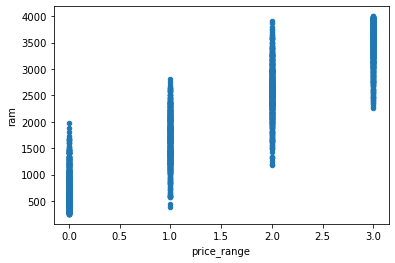

In [8]:
#scatter plot
# lets see if ram increases , does the price range increase too??
data_table.plot(kind='scatter',x='price_range', y='ram', sharex=False, sharey=False)
plt.show()

Above we can see that <span style="color:green"> ram is directly proportional to price range.</span>

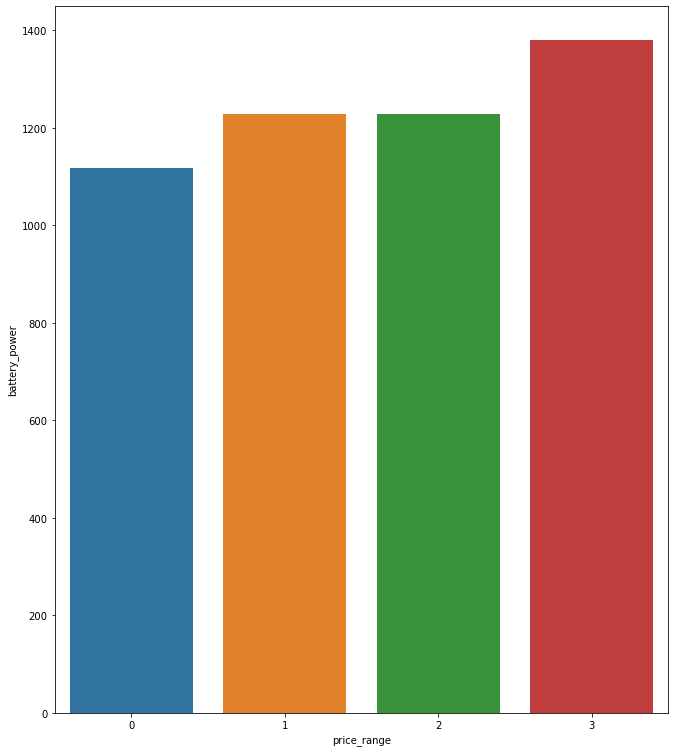

In [9]:
import seaborn as sns
fig = plt.subplots (figsize = (11, 13))
sns.barplot(x='price_range',y='battery_power',data=data_table,ci= None)
plt.show()

##### lastly lets see iff internal memory storage affects the price of a mobile phone ?

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

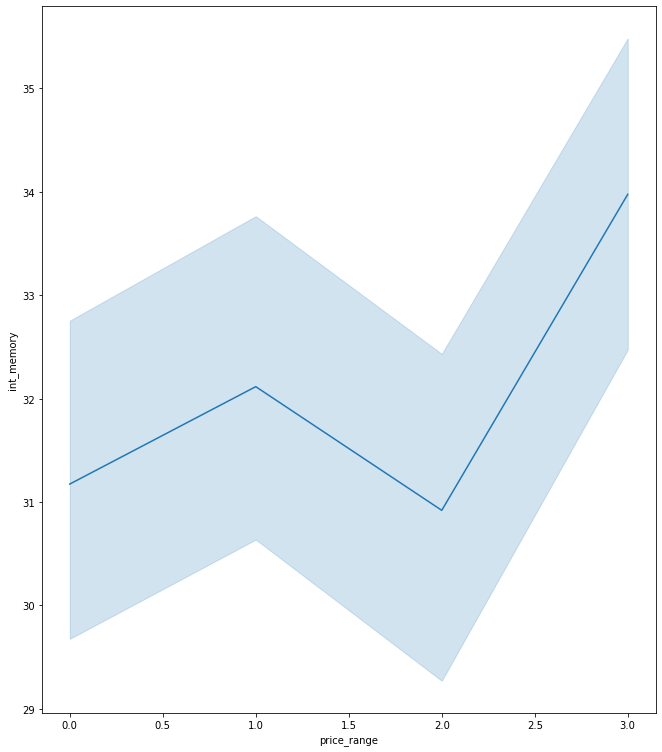

In [10]:
import seaborn as sns
fig = plt.subplots (figsize = (11, 13))
sns.lineplot(x="price_range", y="int_memory",
             data=data_table)

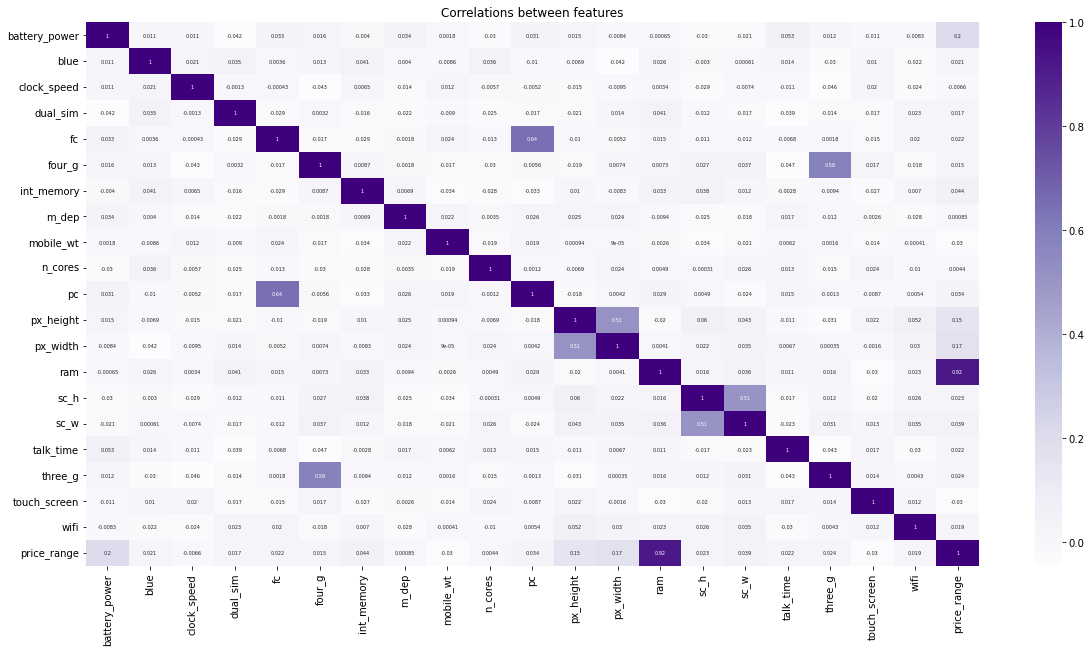

In [11]:
# find if there is any high correlation between features to price_range
#find the most influential feature between features
import seaborn as sns
fig = plt.subplots (figsize = (20, 10))
sns.heatmap(data_table.corr(),annot=True, annot_kws={"size": 5},cmap = "Purples")
plt.title('Correlations between features')
plt.show ()

=> we can summarise that not much features have high correlation to price range except ram 

In [12]:
data_table.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [13]:
data_table

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


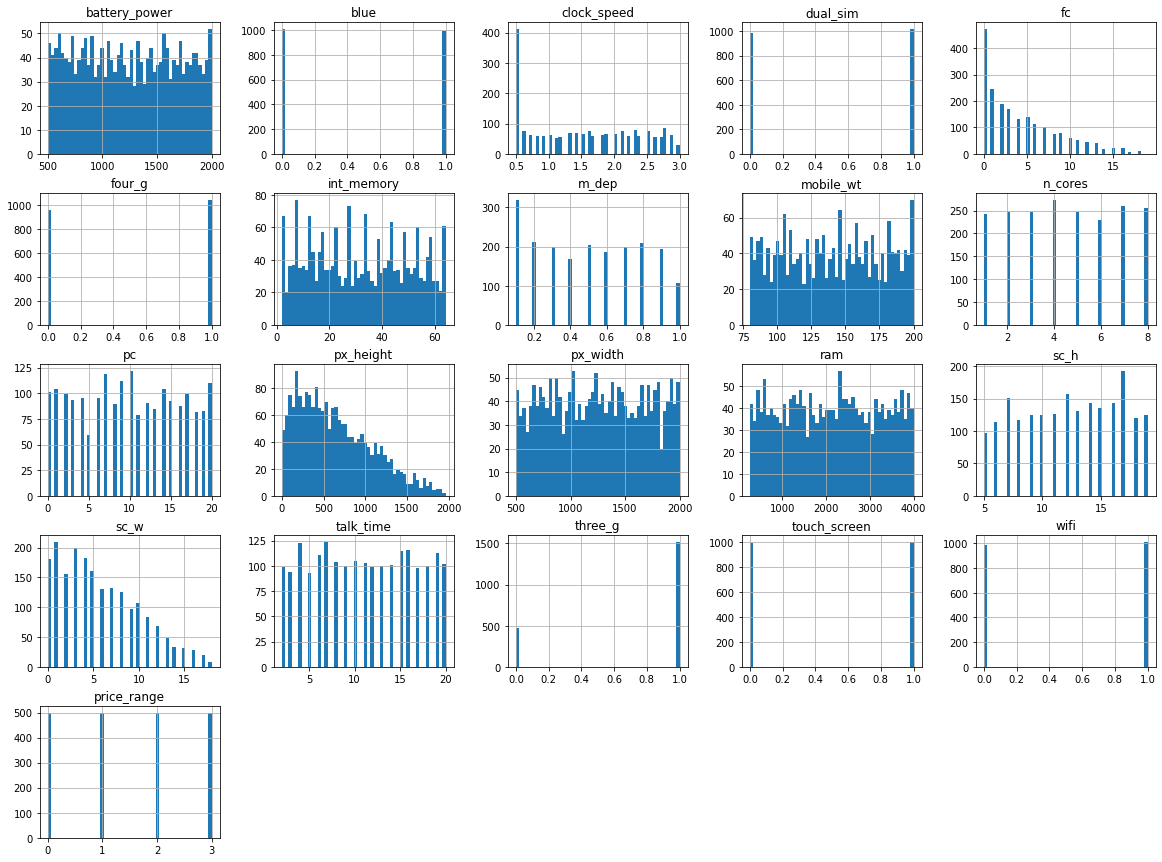

In [14]:
data_table.hist(bins=50,figsize=(20,15))
plt.show()

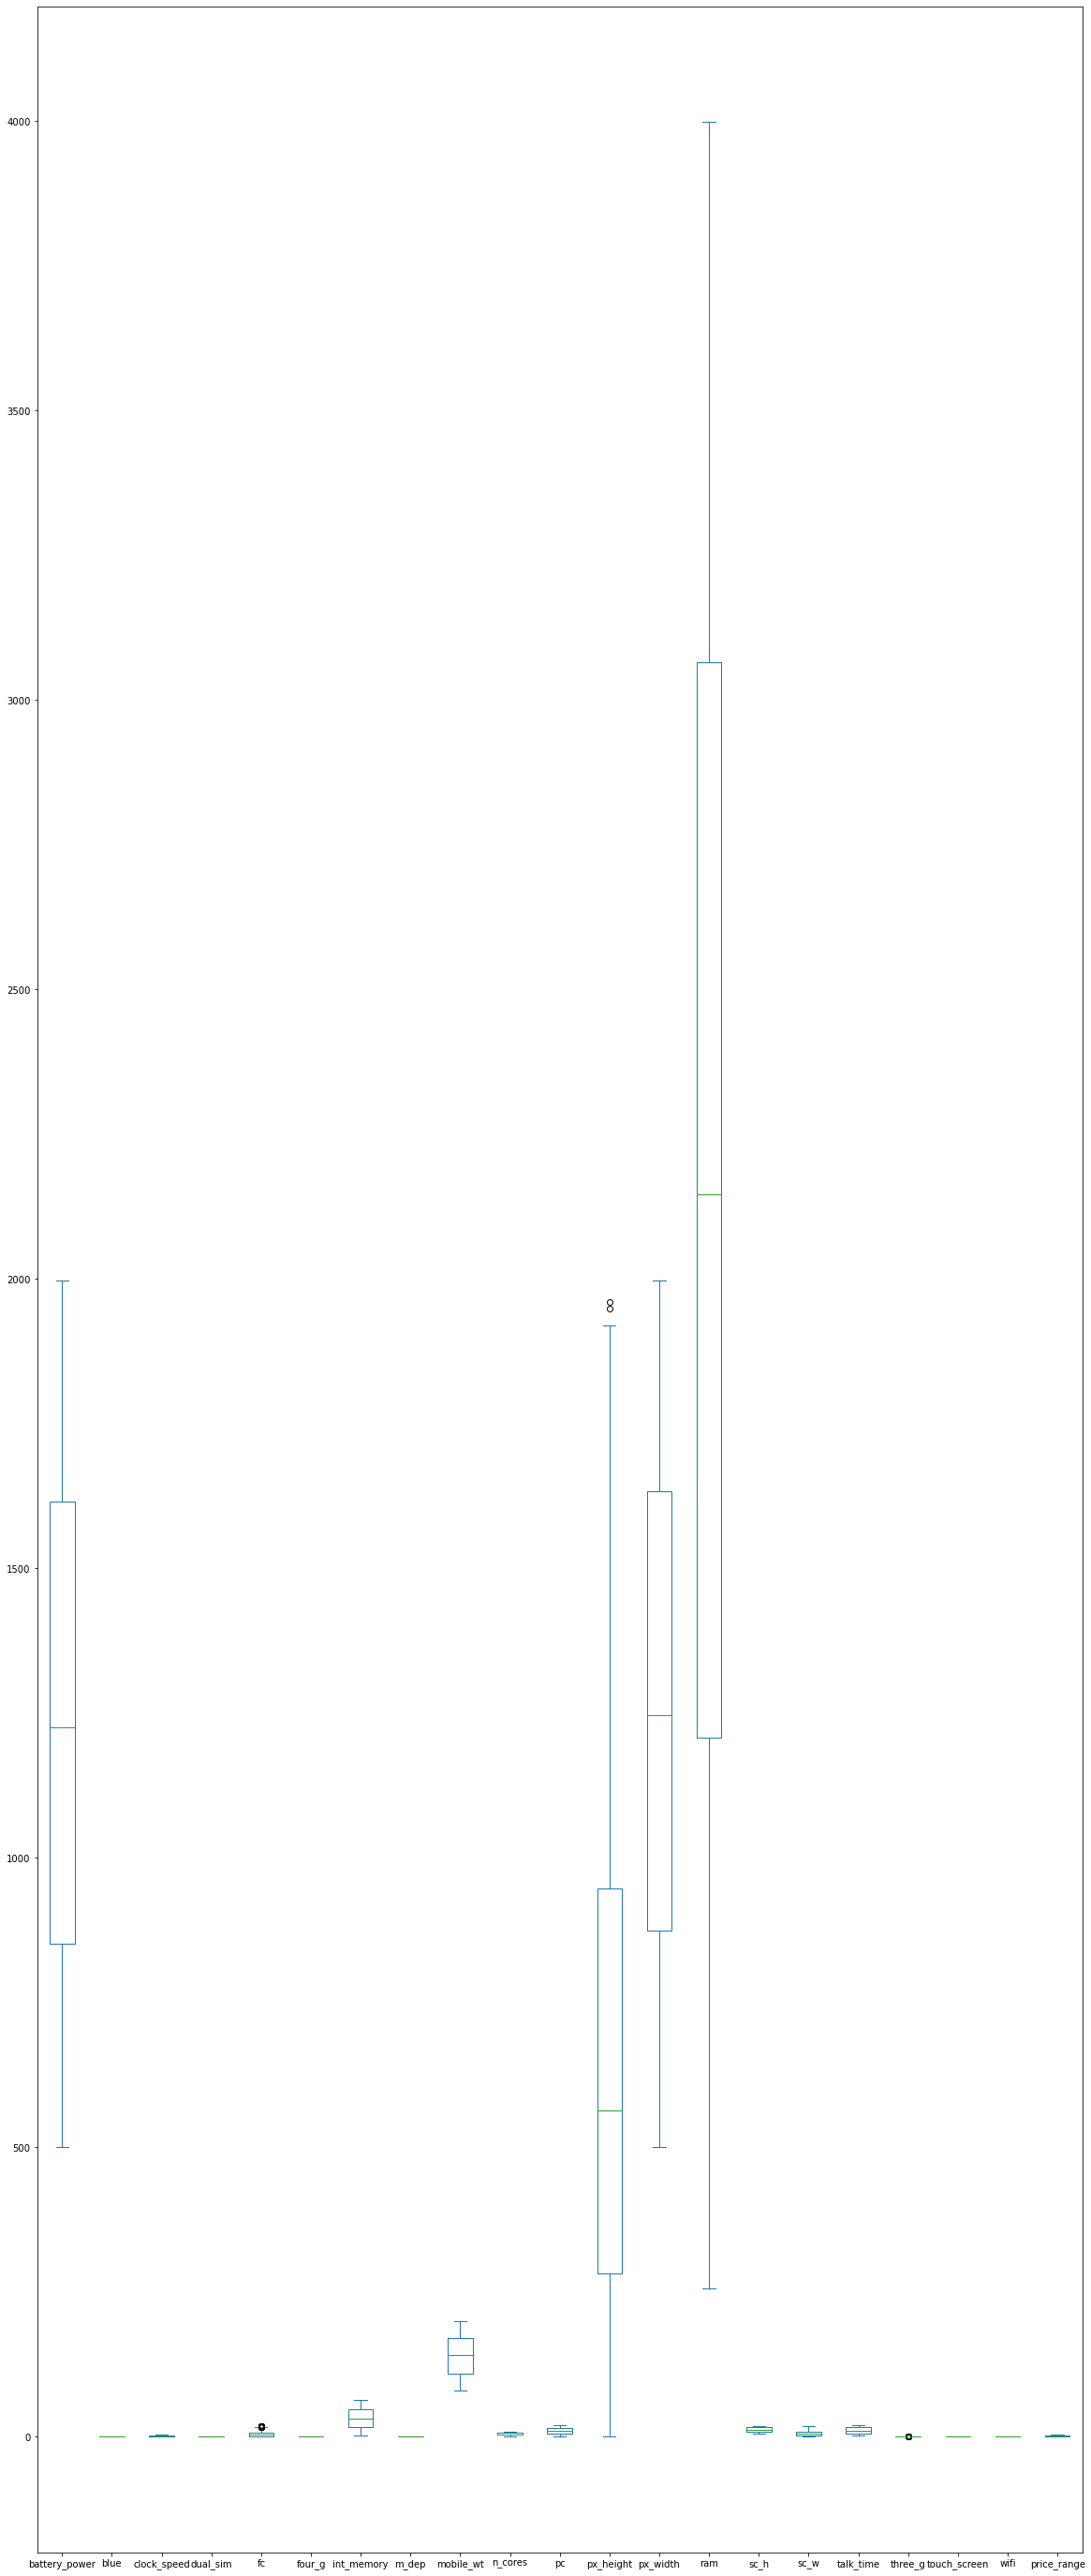

In [15]:
# check if theres any outliers
data_table.plot(kind = 'box',figsize=(20,50))
plt.show()

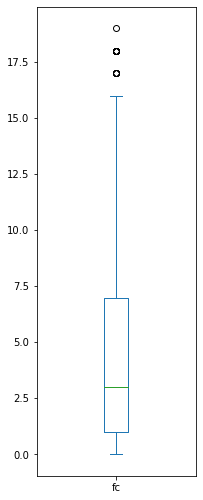

In [16]:
data_table['fc'].plot(kind='box',subplots= True,sharex = False,sharey = False,figsize = (20,50),layout = (5,6))
plt.show()

As you can see from the boxplot , we can identify that there are 3 outliers in front-camera and 2 outliers in pixel height.. 
box plot does not make sense to binary columns like touch_screen,wifi,three_g,four_g,bluetooth.

Since the heat map tells that fc and pc are correlated, i do not want to remove the outliers so that i do not mislead the results.

In [17]:
data_table.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [18]:
X = data_table.iloc[:,0:20] #independenet columns 
Y = data_table.iloc[:,-1] # target column"

In [19]:
# Test options and evaluation metric
validation_size = 0.30
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Maximum Accuracy: 0.9333333333333333 at K =  17


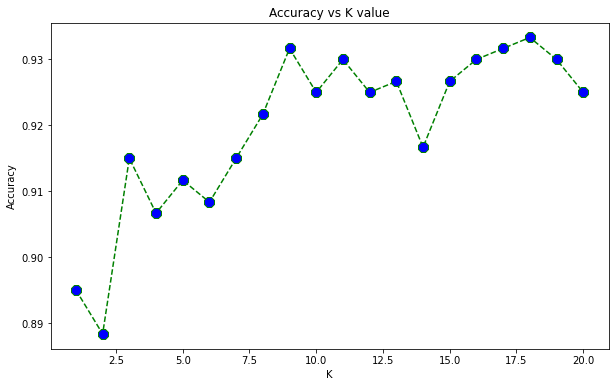

In [20]:
accuracy = []
from sklearn import metrics 
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    knn_predict = knn.predict(X_validation)
    accuracy.append(metrics.accuracy_score(Y_validation,knn_predict))

plt.figure(figsize = (10,6))
plt.plot(range(1,21),accuracy,color = 'green',linestyle = 'dashed', marker = '8', markerfacecolor='blue', markersize = 10)
plt.title('Accuracy vs K value') 
plt.xlabel('K') 
plt.ylabel('Accuracy')
print("Maximum Accuracy:", max(accuracy),"at K = " , accuracy.index(max(accuracy)))

In [21]:
import pandas as pd
import numpy as np 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
#get the k optimal value that we just looped just now 
bestfeatures = SelectKBest(score_func = chi2,k=17) 
fit = bestfeatures.fit(X,Y) 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
# making sort of a datatable to visualize the values 
score_table = pd.concat([dfcolumns,dfscores],axis = 1)
# name the table column
score_table.columns = ['Specifications','Score'] 
# print 15 best features 
print(score_table.nlargest(15,'Score'))

   Specifications          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820


In [22]:
del data_table['three_g']
del data_table['wifi']
del data_table['dual_sim'] 
del data_table['clock_speed'] 
del data_table['blue'] 

##since im deleting three_g, its best to delete four_g too since from the heatmap theres some correlation
del data_table['four_g']

In [23]:
data_table

,battery_power,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,price_range
0,842,1,7,0.6,188,2,2,20,756,2549,9,7,19,0,1
1,1021,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1,2
2,563,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,2
3,615,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,2
4,1821,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1,0
1996,1965,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,2
1997,1911,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,3
1998,1512,4,46,0.1,145,5,5,336,670,869,18,10,19,1,0


## <span style="color:darkblue"> Training the models </span>

In [24]:
#define X and Y again but convert to numpy and split!
Y = data_table['price_range'].to_numpy()
del data_table['price_range']
X = data_table.to_numpy()

In [25]:
# Test options and evaluation metric
validation_size = 0.30
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Normal Default configurations of models

In [26]:
### Normal Default configurations of models
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


In [27]:
# prepare models
from sklearn import ensemble
models = []
models.append(('LogisticR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GTB', ensemble.GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
#models.append(("SGDClassifier",SGDClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    model.fit(X_train,Y_train)
    pred = model.predict(X_validation)
    accuracy_model = accuracy_score(Y_validation,pred)
    print("Accuracy of " ,name, ":", accuracy_model * 100)
print("There are" , len(models) , "models we are going to try out!! ")

/Users/hafsah/opt/anaconda3/envs/ai/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of  LogisticR : 65.16666666666666
Accuracy of  KNN : 91.16666666666666
Accuracy of  SVM : 95.0
Accuracy of  GTB : 88.66666666666667
Accuracy of  RF : 87.33333333333333
Accuracy of  DTC : 82.33333333333334
There are 6 models we are going to try out!! 


### Hyper Tuning Parameters for all models

### 1. Logistic Regression Model

#### Building  Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train,Y_train)
pred = logR.predict(X_validation)
accuracy_LR = accuracy_score(Y_validation,pred)
print("Accuravy of the logistic Regression model: ", accuracy_LR * 100)

Accuravy of the logistic Regression model:  65.16666666666666


/Users/hafsah/opt/anaconda3/envs/ai/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### HyperTuning Logistic Regression Model

In [29]:
logR2 = LogisticRegression(solver='newton-cg')
logR2.fit(X_train,Y_train)
pred2 = logR2.predict(X_validation)
accuracy_LR2 = accuracy_score(Y_validation,pred2)
print("Accuravy of the logistic Regression model: ", accuracy_LR2 * 100)

Accuravy of the logistic Regression model:  96.0


/Users/hafsah/opt/anaconda3/envs/ai/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [30]:
import joblib
joblib.dump(logR2,'models/trained_mobile_logisticRegressor.pkl')

['models/trained_mobile_logisticRegressor.pkl']

### 2. KNeighborsClassifier Model

#### Building KNeighborsClassifier model 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [32]:
knn_predict = knn.predict(X_validation)
accuracy_KN = accuracy_score(Y_validation,knn_predict)
print("Accuracy of the KNeighbors Classifier model: ", accuracy_KN * 100)

Accuracy of the KNeighbors Classifier model:  91.16666666666666


In [33]:
import joblib
joblib.dump(knn,'models/trained_mobile_KNNClassifier.pkl')

['models/trained_mobile_KNNClassifier.pkl']

#### HyperTuning KNeighborsClassifier Model

In [34]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,21))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options,leaf_size=[1,2,4,5,10,15])
#create a new knn object
knn_2 = KNeighborsClassifier()
# use GridSearch
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
#fit the model
best_model = grid.fit(X_train,Y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9349999999999999
{'leaf_size': 1, 'n_neighbors': 16, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=1, n_neighbors=16, weights='distance')


In [35]:
knn_predict1 = best_model.predict(X_validation)
accuracy_KN2 = accuracy_score(Y_validation,knn_predict1)

In [36]:
knn_predict1

array([3, 3, 2, 1, 0, 2, 3, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 3, 1, 2, 2, 3, 0, 0, 3, 3, 2, 3, 2, 1, 3, 2, 3, 2, 0,
       2, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1, 2, 3, 3, 1, 1, 1, 3, 0, 3,
       3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 1, 1, 0, 1, 2,
       1, 3, 2, 3, 3, 0, 0, 3, 1, 0, 3, 1, 2, 0, 3, 2, 0, 1, 0, 2, 2, 2,
       3, 3, 2, 0, 0, 2, 0, 2, 0, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 2, 3, 2,
       1, 0, 3, 1, 2, 1, 1, 0, 1, 0, 2, 3, 3, 1, 0, 1, 2, 0, 2, 0, 3, 1,
       1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 3, 2, 3, 0, 1, 1, 0, 1, 0,
       3, 2, 1, 0, 2, 2, 2, 0, 0, 3, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2,
       3, 0, 0, 2, 2, 0, 0, 1, 3, 0, 1, 0, 0, 2, 2, 1, 0, 2, 3, 3, 1, 3,
       2, 0, 3, 1, 3, 2, 2, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 1, 0, 3, 3, 3,
       1, 1, 1, 2, 2, 3, 0, 1, 3, 0, 0, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3,
       0, 3, 1, 2, 2, 3, 2, 3, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 1, 1, 3, 2,
       0, 3, 2, 3, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0,

In [37]:
print("Accuracy of the KNeighbors Classifier model: ", accuracy_KN2 * 100)

Accuracy of the KNeighbors Classifier model:  92.5


### 3. Gradient Tree Boosting Classifier Model

#### Building Gradient Tree Boosting Classifier Model (Ensemble Method)

In [38]:
model1 = ensemble.GradientBoostingClassifier()
model1.fit(X_train,Y_train)
pred = model1.predict(X_validation)
accuracy_GT1 = accuracy_score(Y_validation,pred)
print("Accuracy of the gradient tree boosting classifier model: ", accuracy_GT1 * 100)

Accuracy of the gradient tree boosting classifier model:  88.66666666666667


#### HyperTuning Gradient Tree Boosting Classifier Model

In [39]:
## willl be using grid search here to tune hyper parameters
from sklearn import ensemble
model2 = ensemble.GradientBoostingClassifier()

# Parameters we want to try
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse","squared_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[1000,3000],
}


In [40]:
# Define the grid search we want to run. Run it with four cpus in parallel.
from sklearn.model_selection import GridSearchCV
gs_cv = GridSearchCV(model2, param_grid, n_jobs=4, verbose=100)

# Run the grid search - on only the training data!
gs_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
[CV 3/5; 1/392] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=log2, n_estimators=1000, subsample=0.5
[CV 3/5; 1/392] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=log2, n_estimators=1000, subsample=0.5;, score=0.861 total time=   3.2s
[CV 1/5; 2/392] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=log2, n_estimators=1000, subsample=0.618
[CV 1/5; 2/392] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=log2, n_estimators=1000, subsample=0.618;, score=0.850 total time=   3.2s
[CV 5/5; 2/392] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=log2, n_estimators=1000, subsample=0.618
[CV 5/5; 2/392] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=log2, n_estimators=1000, subsample=0.618;, score=0.857 total time=   3.2s
[CV 4/5; 3/392] START criterion=fried

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'], 'max_features': ['log2', 'sqrt'],
                         'n_estimators': [1000, 3000],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]},
             verbose=100)

In [41]:
# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.05, 'loss': 'deviance', 'max_features': 'log2', 'n_estimators': 1000, 'subsample': 0.5}


In [42]:
from sklearn import ensemble
# creating a gradient boosting classifier with best params
GT_BR = ensemble.GradientBoostingClassifier(
        criterion = 'squared_error',
        learning_rate = 0.05,
        loss = 'deviance',
        max_features = 'log2',
        n_estimators = 1000,
        subsample = 0.5,
)
# fit
gt_br_model = GT_BR.fit(X_train,Y_train)

In [43]:
gt_br_predict = gt_br_model.predict(X_validation)
#find accuracy score of the hypertuned model
accuracy_GT2 = accuracy_score(Y_validation,gt_br_predict)

In [44]:
print("Accuracy done by gradient boosting:",accuracy_GT2 )

Accuracy done by gradient boosting: 0.8983333333333333


In [45]:
joblib.dump(gt_br_model,'models/trained_mobile_gradientBoosting.pkl')

['models/trained_mobile_gradientBoosting.pkl']

### 4. SVM

#### Building Support Vector Machine 

In [46]:
svm = SVC()
svm_model = svm.fit(X_train,Y_train)
svm_predict = svm_model.predict(X_validation)
accuracy_svm = accuracy_score(Y_validation,svm_predict)
print("Accuracy of the svm model: ", accuracy_svm * 100)

Accuracy of the svm model:  95.0


#### HyperTuning Support Vector Machine Model 

In [47]:
# grid search method 
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [.1,.5,.25,1],
             'kernel':['rbf','poly','sigmoid','linear']}
GS = GridSearchCV(SVC(),param_grid,cv=5)

In [48]:
model_svm = GS.fit(X_train,Y_train)
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'gamma': 0.1, 'kernel': 'linear'} are the best.
the best score is 0.97.


In [49]:
SVM = SVC(
    gamma = 0.1,
    kernel = 'linear'
)

In [51]:
model_svm2 = SVM.fit(X_train,Y_train)

In [52]:
svm_pred2  = model_svm2.predict(X_validation)

In [53]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing classification report
print(classification_report(Y_validation, svm_pred2))

# Printing accuracy
print(accuracy_score(Y_validation,svm_pred2))
accuracy_svm = accuracy_score(Y_validation,svm_pred2)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       162
           1       0.98      0.97      0.98       144
           2       0.97      0.96      0.96       154
           3       0.97      0.98      0.98       140

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

0.9766666666666667


In [54]:
print("Accuravy of the updated svm model: ", accuracy_svm * 100)

Accuravy of the updated svm model:  97.66666666666667


<AxesSubplot:>

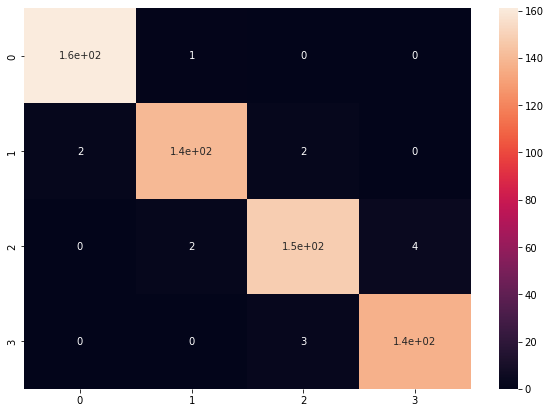

In [55]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(Y_validation,svm_pred2)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

In [56]:
joblib.dump(model_svm2,'models/trained_mobile_svm_updated_final.pkl')

['models/trained_mobile_svm_updated_final.pkl']

### 5. Random Forest Model

#### Building Default Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
MODEL2 = rf.fit(X_train,Y_train)
rf_predict = MODEL2.predict(X_validation)
accuracy_rf = accuracy_score(Y_validation,rf_predict)
print("Accuracy of Random Forest Model:",accuracy_rf)

Accuracy of Random Forest Model: 0.8783333333333333


#### HyperTuning Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
params = {'criterion':['gini','entropy'],
         'n_estimators':[100,300,500,800,1200],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7],
          'random_state':[123]}
rf_gridS = GridSearchCV(model,param_grid=params,n_jobs=-1)

In [59]:
rf_gridS.fit(X_train, Y_train)


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 300, 500, 800, 1200],
                         'random_state': [123]})

In [60]:
# Print the parameters that gave us the best result!
print(rf_gridS.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1200, 'random_state': 123}


In [61]:
updated_model = RandomForestClassifier(
    criterion = "entropy",
    min_samples_leaf = 1,
    min_samples_split = 6,
    n_estimators = 1200,
    random_state = 123,
)
updated_rf_model = updated_model.fit(X_train,Y_train)
rf_predict = updated_rf_model.predict(X_validation)
accuracy_rf2 = accuracy_score(Y_validation,rf_predict)

In [62]:
print("Accuracy of Random Forest Model:",accuracy_rf2)

Accuracy of Random Forest Model: 0.88


### 6. Decision Tree Model

#### Building Default Decision Tree Model

In [63]:
from sklearn.tree import DecisionTreeClassifier
import joblib
dt_classfier = DecisionTreeClassifier()
model_dt = dt_classfier.fit(X_train,Y_train)
dt_classi_predict = model_dt.predict(X_validation)
accuravy_DT = accuracy_score(Y_validation,dt_classi_predict)
print("Accuravy of the decision tree classifier model: ", accuravy_DT * 100)
joblib.dump(model_dt,'models/trained_mobile_decisionTreeClassifier.pkl')

Accuravy of the decision tree classifier model:  82.33333333333334


['models/trained_mobile_decisionTreeClassifier.pkl']

#### Hypertuning Decision Tree Model

In [64]:
import numpy as np
feature_labels = np.array(['battery_power','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','touch_screen'])
model = joblib.load('models/trained_mobile_decisionTreeClassifier.pkl')
#create a numpy array based on the models feature importance
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()

for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index],(importance[index] * 100.0)))


touch_screen - 0.00%
m_dep - 0.35%
sc_h - 0.40%
fc - 0.58%
mobile_wt - 0.82%
sc_w - 0.85%
talk_time - 0.91%
n_cores - 0.97%
pc - 1.29%
int_memory - 1.67%
px_width - 6.66%
px_height - 10.37%
battery_power - 14.20%
ram - 60.93%


In [65]:
new_dataTable_dt = data_table.copy()

In [66]:
data_table

,battery_power,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen
0,842,1,7,0.6,188,2,2,20,756,2549,9,7,19,0
1,1021,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1
2,563,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1
3,615,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0
4,1821,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1
1996,1965,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1
1997,1911,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1
1998,1512,4,46,0.1,145,5,5,336,670,869,18,10,19,1


In [67]:
del new_dataTable_dt['touch_screen']
del new_dataTable_dt['m_dep']

In [68]:
new_dataTable_dt

,battery_power,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,1,7,188,2,2,20,756,2549,9,7,19
1,1021,0,53,136,3,6,905,1988,2631,17,3,7
2,563,2,41,145,5,6,1263,1716,2603,11,2,9
3,615,0,10,131,6,9,1216,1786,2769,16,8,11
4,1821,13,44,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0,2,106,6,14,1222,1890,668,13,4,19
1996,1965,0,39,187,4,3,915,1965,2032,11,10,16
1997,1911,1,36,108,8,3,868,1632,3057,9,1,5
1998,1512,4,46,145,5,5,336,670,869,18,10,19


In [69]:
X = new_dataTable_dt.to_numpy()

In [70]:
# Test options and evaluation metric
validation_size = 0.30
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [71]:
dt_classfier2 = DecisionTreeClassifier()
model_dt2 = dt_classfier2.fit(X_train,Y_train)
dt_classi_predict2 = model_dt2.predict(X_validation)
accuravy_DT2 = accuracy_score(Y_validation,dt_classi_predict)
print("Accuravy of the decision tree classifier model: ", accuravy_DT2 * 100)

Accuracy_changes_dt = accuravy_DT2 - accuravy_DT
print("DIFFERENCE of the decision tree classifier model: ",Accuracy_changes_dt *100)
joblib.dump(model_dt2,'models/trained_mobile_decisionTreeClassifier.pkl')

Accuravy of the decision tree classifier model:  82.33333333333334
DIFFERENCE of the decision tree classifier model:  0.0


['models/trained_mobile_decisionTreeClassifier.pkl']

In [72]:
#hypertuning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'splitter' :['best', 'random'],
             
            }
clf = GridSearchCV(dt_classfier2, tree_para, cv=5)
model_dt3 = clf.fit(X_train,Y_train)

In [73]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 11, 'splitter': 'best'}


In [74]:
dt_classfier2 = DecisionTreeClassifier(
     criterion = 'entropy',
     max_depth = 11,
    splitter = 'best'
)


In [75]:
updated_dt_model = dt_classfier2.fit(X_train,Y_train)

In [76]:
dt_classi_predict2 = updated_dt_model.predict(X_validation)
accuravy_DT2 = accuracy_score(Y_validation,dt_classi_predict2)
print("Accuravy of the decision tree classifier model: ", accuravy_DT2 * 100)

Accuravy of the decision tree classifier model:  85.5


## <span style="color:darkblue"> Choosing the best model </span>

In [77]:
accuracy_LR2

0.96

In [78]:
accuravy_DT2

0.855

In [79]:
accuracy_KN2

0.925

In [80]:
accuracy_svm

0.9766666666666667

In [81]:
accuracy_GT2

0.8983333333333333

In [82]:
accuracy_rf2

0.88

In [83]:
X = data_table.to_numpy()

In [84]:
# Test options and evaluation metric
validation_size = 0.30
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [85]:
from sklearn import ensemble
up_models = []
up_models.append(('LogisticR', LogisticRegression(solver='newton-cg')))
up_models.append(('KNN', KNeighborsClassifier(leaf_size=1, n_neighbors=16, weights='distance')))
up_models.append(('SVM', SVC(gamma = 0.1,kernel = 'linear')))
up_models.append(('GTB', ensemble.GradientBoostingClassifier(criterion = 'squared_error',learning_rate = 0.15,loss = 'deviance',max_features = 'sqrt',n_estimators = 3000,subsample = 0.5)))
up_models.append(('RF', RandomForestClassifier(criterion = "entropy",min_samples_leaf = 1,min_samples_split = 6,n_estimators = 1200,random_state = 123,)))
up_models.append(('DTC', DecisionTreeClassifier(criterion = 'entropy',max_depth = 11,splitter = 'best')))

results = []
names = []
scoring = 'accuracy'
for name, model in up_models:
    model.fit(X_train,Y_train)
    pred = model.predict(X_validation)
    accuracy_model = accuracy_score(Y_validation,pred)
    print("Accuracy of " ,name, ":", accuracy_model * 100)
print("There are" , len(models) , "models we have tried out!! ")

/Users/hafsah/opt/anaconda3/envs/ai/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Accuracy of  LogisticR : 96.0
Accuracy of  KNN : 92.5
Accuracy of  SVM : 97.66666666666667
Accuracy of  GTB : 89.5
Accuracy of  RF : 88.0
Accuracy of  DTC : 85.5
There are 6 models we have tried out!! 


#### Create a graph to image out the accuracy of all models and then choose the best accurate model

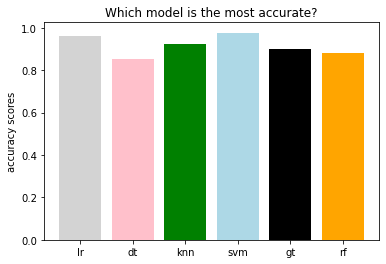

In [86]:
models = ['lr', 'dt', 'knn','svm','gt','rf']
acc_scores = [accuracy_LR2, accuravy_DT2, accuracy_KN2,accuracy_svm,accuracy_GT2,accuracy_rf2]

plt.bar(models, acc_scores, color=['lightgrey', 'pink', 'green', 'lightblue','black','orange'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

##### <span style="color:purple"> Conclusion : Best model is *Support Vector Machine*

## <span style="color:darkblue"> Save Model & Deploy on Web Application </span>

In [87]:
# SAVE MODEL
joblib.dump(model_svm2,'models/trained_mobile_svm_updated_final.pkl')

['models/trained_mobile_svm_updated_final.pkl']

In [88]:
data_table

,battery_power,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen
0,842,1,7,0.6,188,2,2,20,756,2549,9,7,19,0
1,1021,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1
2,563,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1
3,615,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0
4,1821,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1
1996,1965,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1
1997,1911,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1
1998,1512,4,46,0.1,145,5,5,336,670,869,18,10,19,1


In [89]:
##done